<div style="background-color: #30302E; padding: 20px; border-radius: 10px; border-left: 5px solid #007bff;">
    <h1 style="text-align: center;">🔬 Diabetes Classification Project</h1>
    <h2 style=" text-align: center;">Comprehensive Exploratory Data Analysis</h2>
</div>

<div style="background-color: #30302E; padding: 15px; border-radius: 5px; margin-top: 20px;">
    <p><strong>Project Overview:</strong> This notebook analyzes a dataset for diabetes classification into three categories: No Diabetes (0), Prediabetes (1), and Diabetes (2). We aim to uncover key insights and patterns to support the development of a robust classification model.</p>
</div>

<div style="background-color: #30302E; padding: 15px; border-radius: 5px;">
    <h3 style="color: #856404;">📋 Analysis Objectives</h3>
    <ul>
        <li>Understand feature distributions and identify any skewness</li>
        <li>Analyze class imbalance in the target variable</li>
        <li>Identify correlations between features and the target</li>
        <li>Determine feature importance for model development</li>
        <li>Provide recommendations for model building stages</li>
    </ul>
</div>

## 📦 Import Libraries and Load Data

In [6]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import sys

# Ignore warnings for cleaner notebook output
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Add the project root to the path to import project modules
sys.path.append(str(Path.cwd().parent))

# Import our custom analysis modules
from analysis.analyze_distributions import analyze_distributions
from analysis.analyze_class_imbalance import analyze_class_imbalance
from analysis.analyze_correlations import analyze_correlations
from analysis.analyze_feature_importance import analyze_feature_importance

# For displaying images inline
from IPython.display import Image, display

In [8]:
# Let's load our diabetes dataset
data_path = "../data/extracted/diabetes_data/diabetes_012_health_indicators_BRFSS2015.csv"
df = pd.read_csv(data_path)

# Quick look at the data
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [13]:
# Basic statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [14]:
# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found in the dataset!")

No missing values found in the dataset!


In [ ]:
# check for duplicated values 
print(df.duplicated().sum())

23899


<div style="background-color: #30302E; padding: 15px; border-radius: 5px;">
    <h2>📊 Feature Distributions Analysis</h2>
    <p>Let's analyze the distributions of different feature types: binary, continuous, and ordinal features.</p>
</div>

In [19]:
# Run the distribution analysis
analyze_distributions(df)

# Display the generated images
distribution_path = "reports/distributions_figures/"

# Function to display images with title
def display_image_with_title(image_path, title):
    print(f"\n## {title}")
    display(Image(image_path))

[2025-02-22 16:11:25] |     INFO | [analyze_distributions.py:  94] | analyze_distribution | The binaries feature distribution analysis is completed and saved in reports\distributions_figures
[2025-02-22 16:11:31] |     INFO | [analyze_distributions.py: 127] | analyze_distribution | The continuous feature distribution analysis is completed and saved in reports\distributions_figures
[2025-02-22 16:11:33] |     INFO | [analyze_distributions.py: 175] | analyze_distribution | The ordinal feature distribution analysis is completed and saved in reports\distributions_figures



## Binary Features Distribution


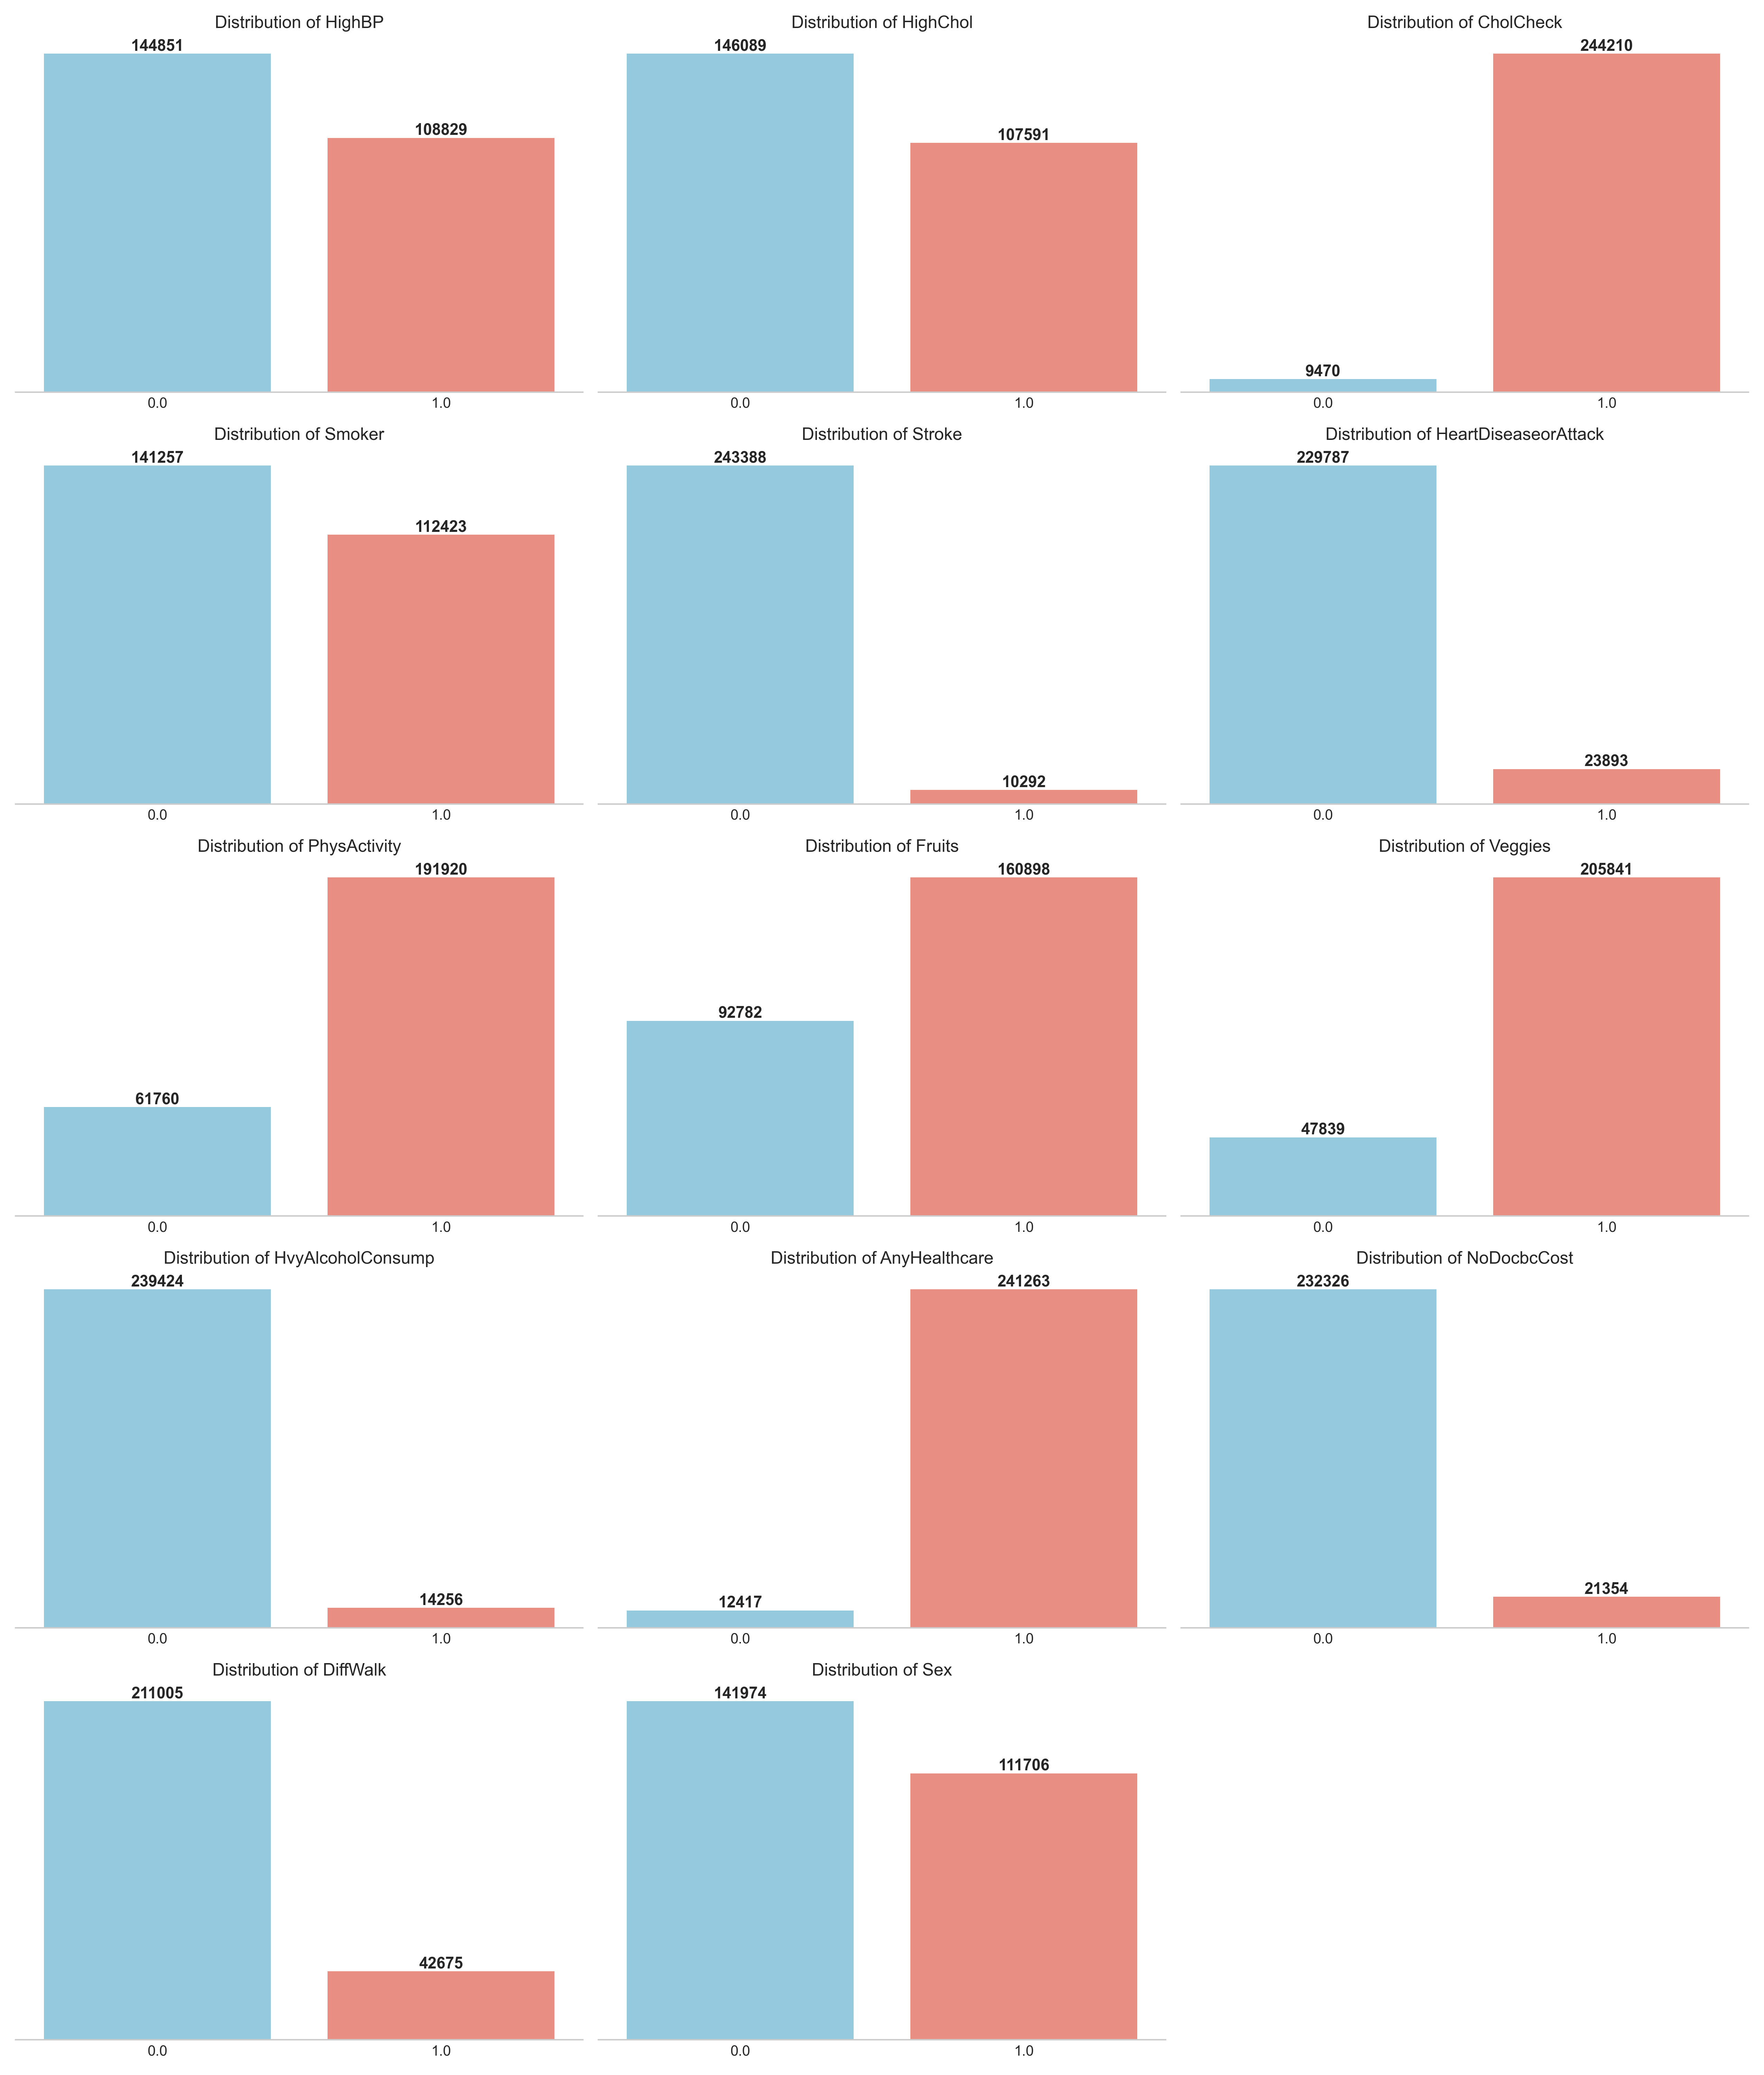

In [20]:
# Display binary features distribution
display_image_with_title(distribution_path + "binary_features_distribution.png", "Binary Features Distribution")

<div style="background-color: #30302E; padding: 15px; border-radius: 5px; margin-top: 10px;">
    <h3>Observations on Binary Features:</h3>
    <p><strong>Highly Imbalanced Features:</strong></p>
    <ul>
        <li><strong>CholCheck</strong>: Most patients have had cholesterol checks</li>
        <li><strong>Stroke</strong>: Very few patients have had a stroke</li>
        <li><strong>HeartDiseaseorAttack</strong>: Minority have heart disease history</li>
        <li><strong>Veggies</strong>: Most consume vegetables</li>
        <li><strong>HvyAlcoholConsump</strong>: Few report heavy alcohol consumption</li>
        <li><strong>AnyHealthcare</strong>: Most have some form of healthcare access</li>
        <li><strong>NoDocbcCost</strong>: Minority unable to see doctor due to cost</li>
    </ul>
    <p><strong>Moderately Imbalanced Features:</strong></p>
    <ul>
        <li><strong>PhysActivity</strong>: Higher proportion engaging in physical activity</li>
        <li><strong>Fruits</strong>: Most consume fruits, but more balanced than vegetables</li>
        <li><strong>DiffWalk</strong>: Minority report difficulty walking</li>
    </ul>
</div>


## Continuous Features Distribution


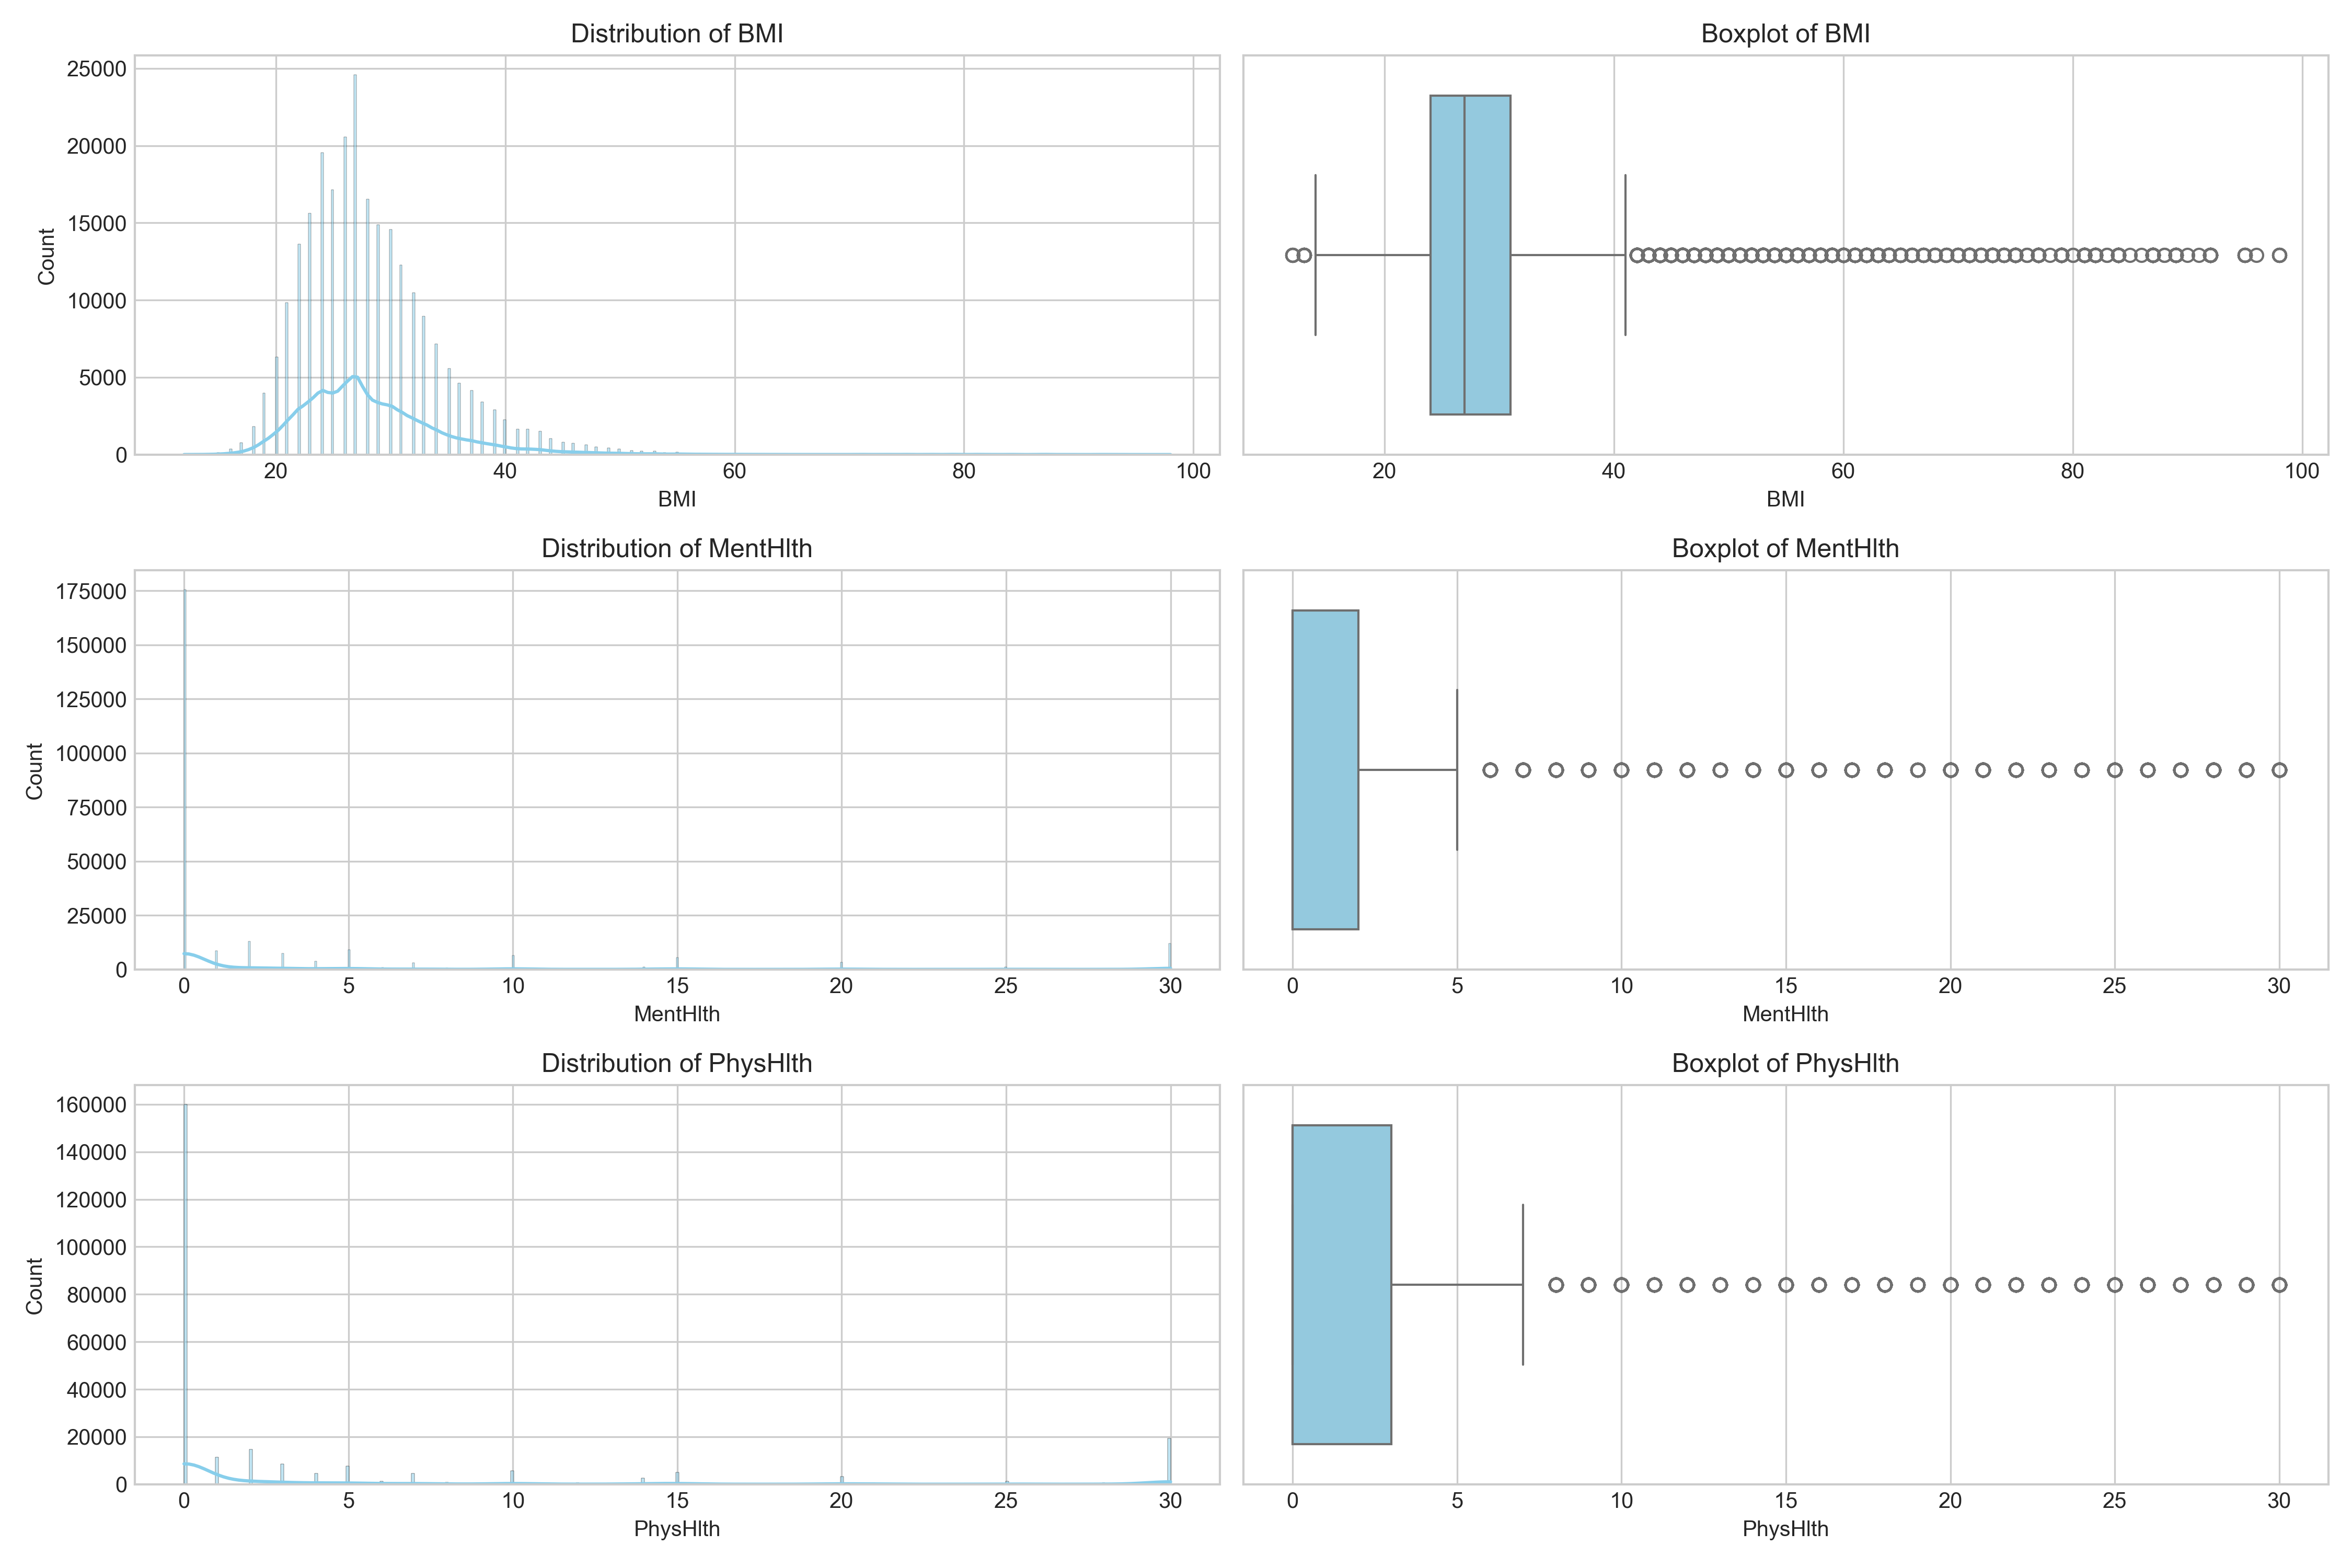

In [21]:
# Display continuous features distribution
display_image_with_title(distribution_path + "continuous_features_distribution.png", "Continuous Features Distribution")

<div style="background-color: #30302E; padding: 15px; border-radius: 5px; margin-top: 10px;">
    <h3>Observations on Continuous Features:</h3>
    <ul>
        <li><strong>BMI</strong>: Right-skewed distribution with many outliers above 40</li>
        <li><strong>MentHlth</strong>: Highly left-skewed with most values between 0-3, indicating few reported mental health issues for most individuals</li>
        <li><strong>PhysHlth</strong>: Similarly left-skewed with most values between 0-3, suggesting few physical health issues reported by most patients</li>
        <li>All three features show notable outliers that may require attention during preprocessing</li>
    </ul>
</div>


## Ordinal Features Distribution


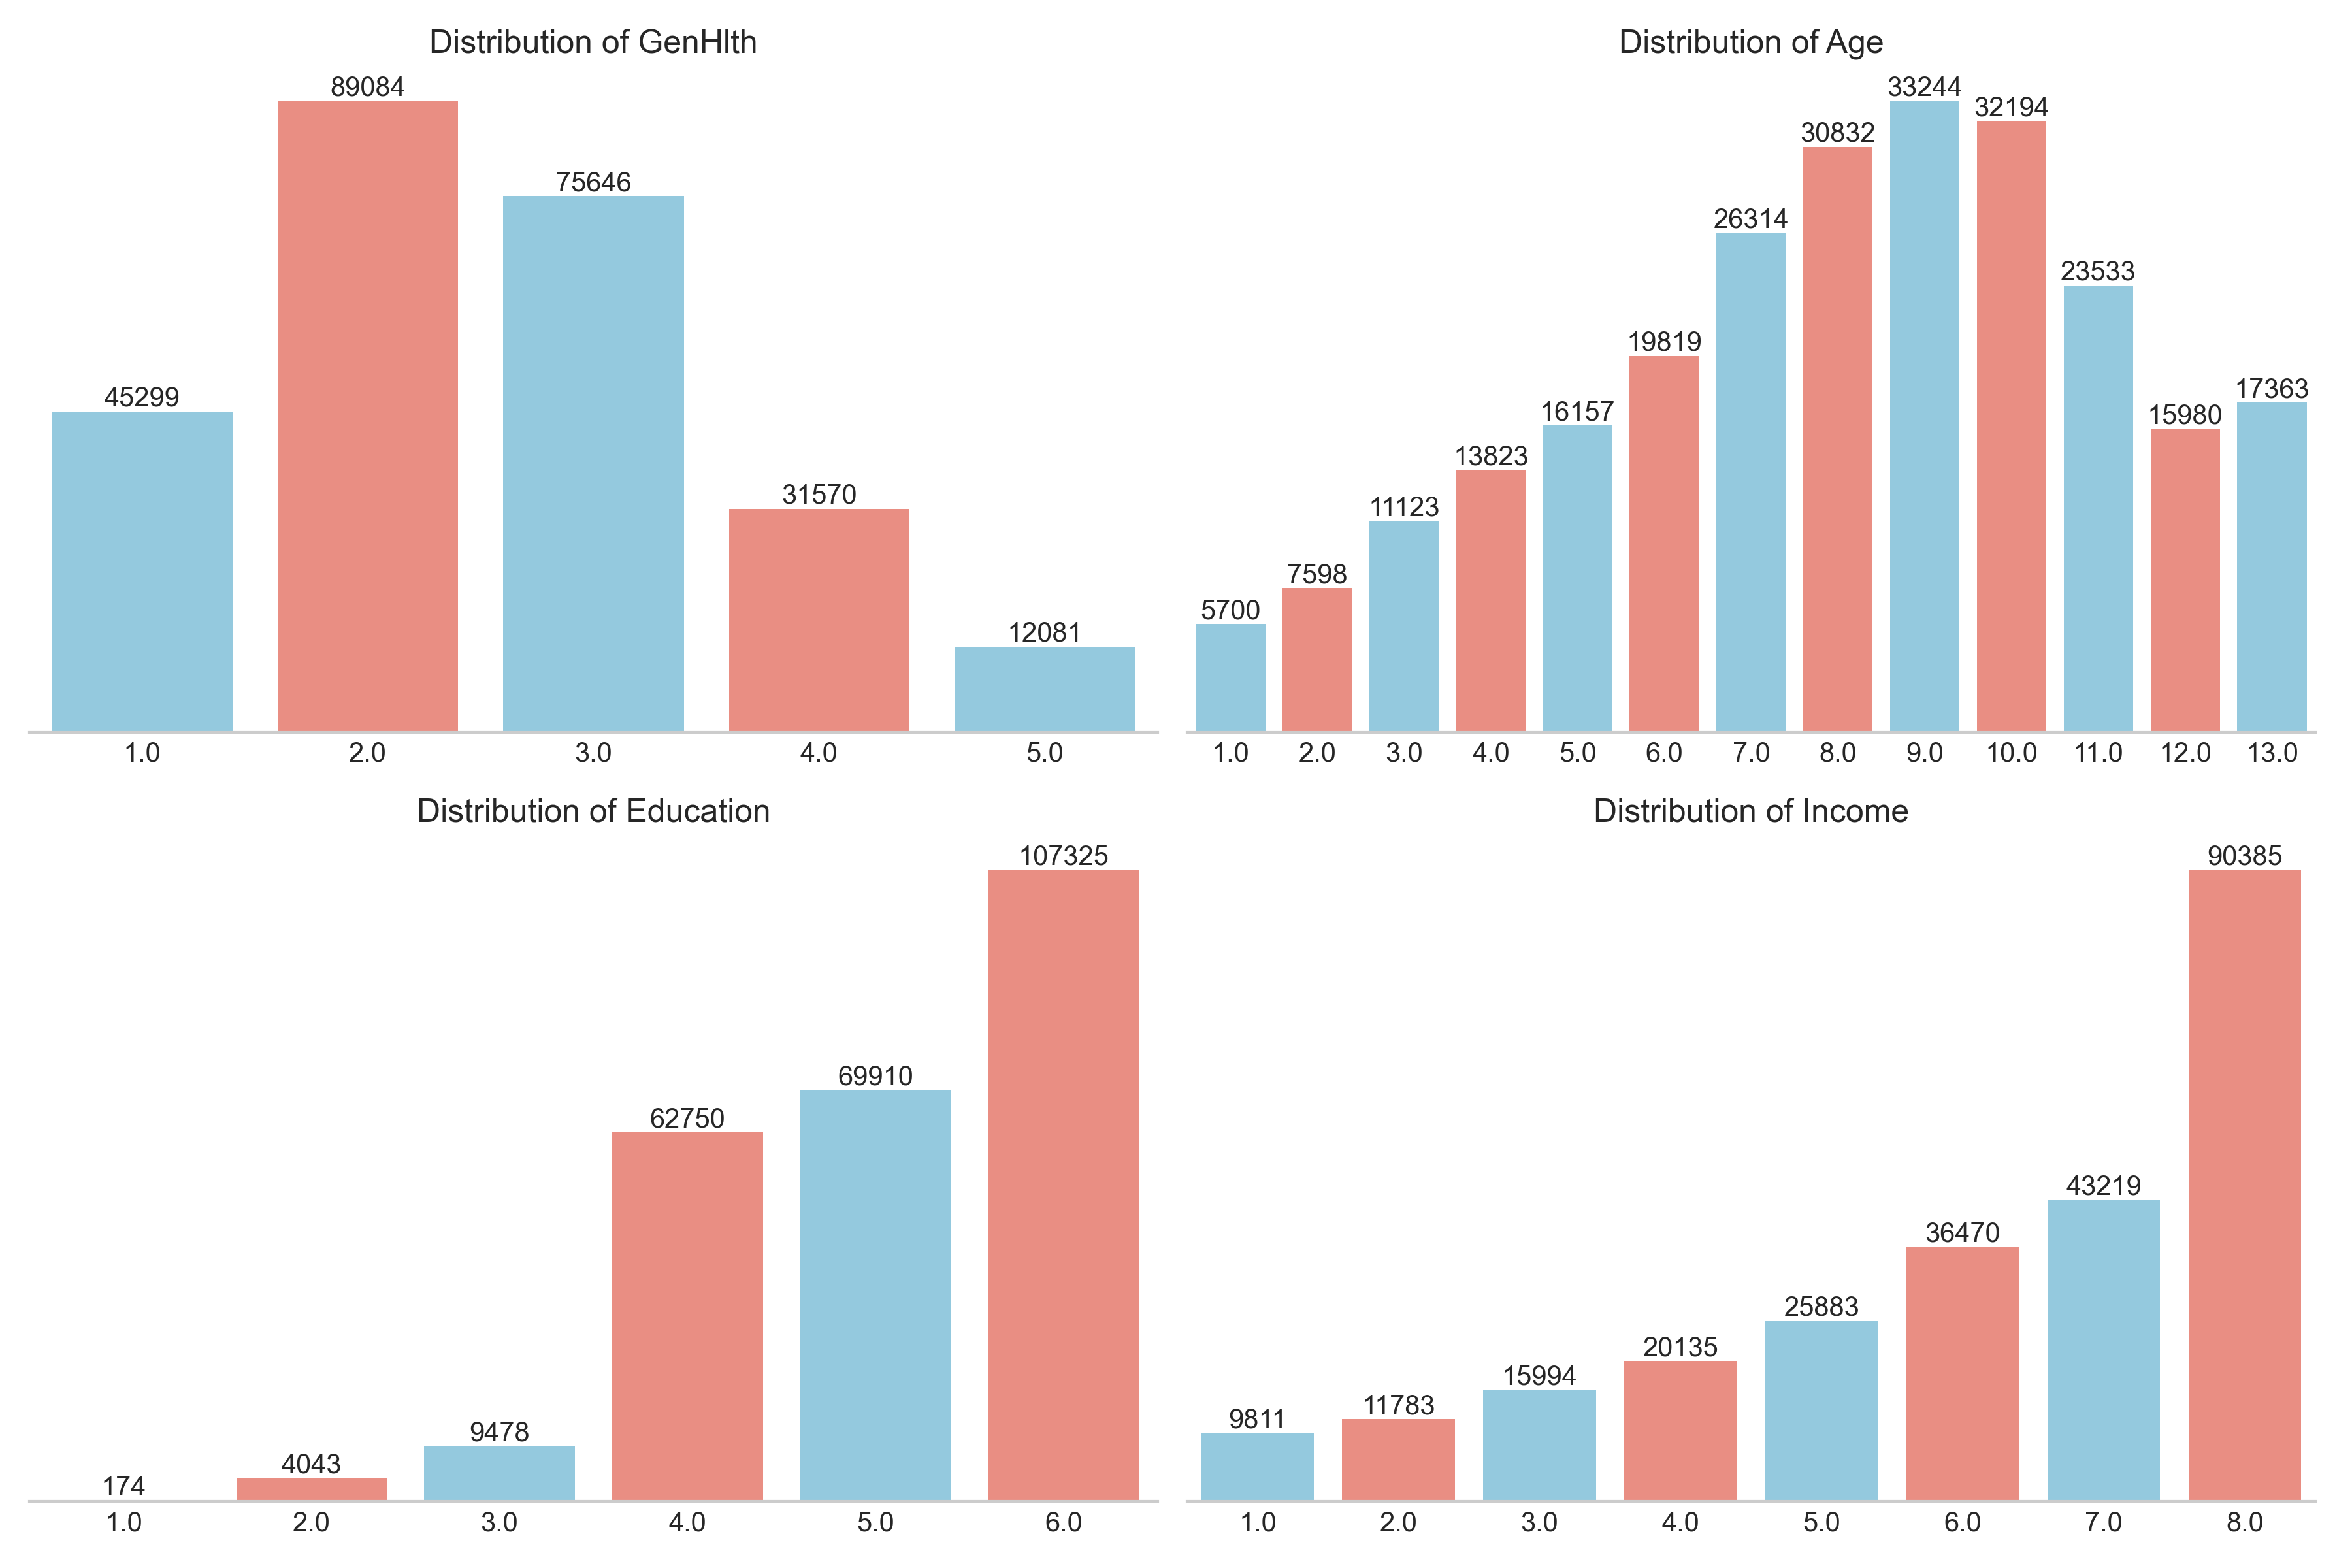

In [22]:
# Display ordinal features distribution
display_image_with_title(distribution_path + "ordinal_features_distribution.png", "Ordinal Features Distribution")

<div style="background-color: #30302E; padding: 15px; border-radius: 5px; margin-top: 10px;">
    <h3>Observations on Ordinal Features:</h3>
    <ul>
        <li><strong>GenHlth</strong>: Follows a log-normal distribution, with most people reporting good to very good health</li>
        <li><strong>Age</strong>: Also follows a log-normal distribution, with higher representation in middle age categories</li>
        <li><strong>Education</strong>: Left-skewed with higher counts for better-educated individuals</li>
        <li><strong>Income</strong>: Left-skewed with higher representation in higher income brackets</li>
    </ul>
</div>

<div style="background-color: #30302E; padding: 15px; border-radius: 5px; border-left: 5px solid #17a2b8;">
    <h2 >⚖️ Target Class Imbalance Analysis</h2>
    <p>Let's analyze the distribution of our target variable to understand the class imbalance.</p>
</div>

[2025-02-22 16:15:09] |     INFO | [analyze_class_imbalance.py:  77] | Class imbalance analysis | the Class Distribution Bar is saved in reports\class_imbalance_figures

## Target Class Distribution


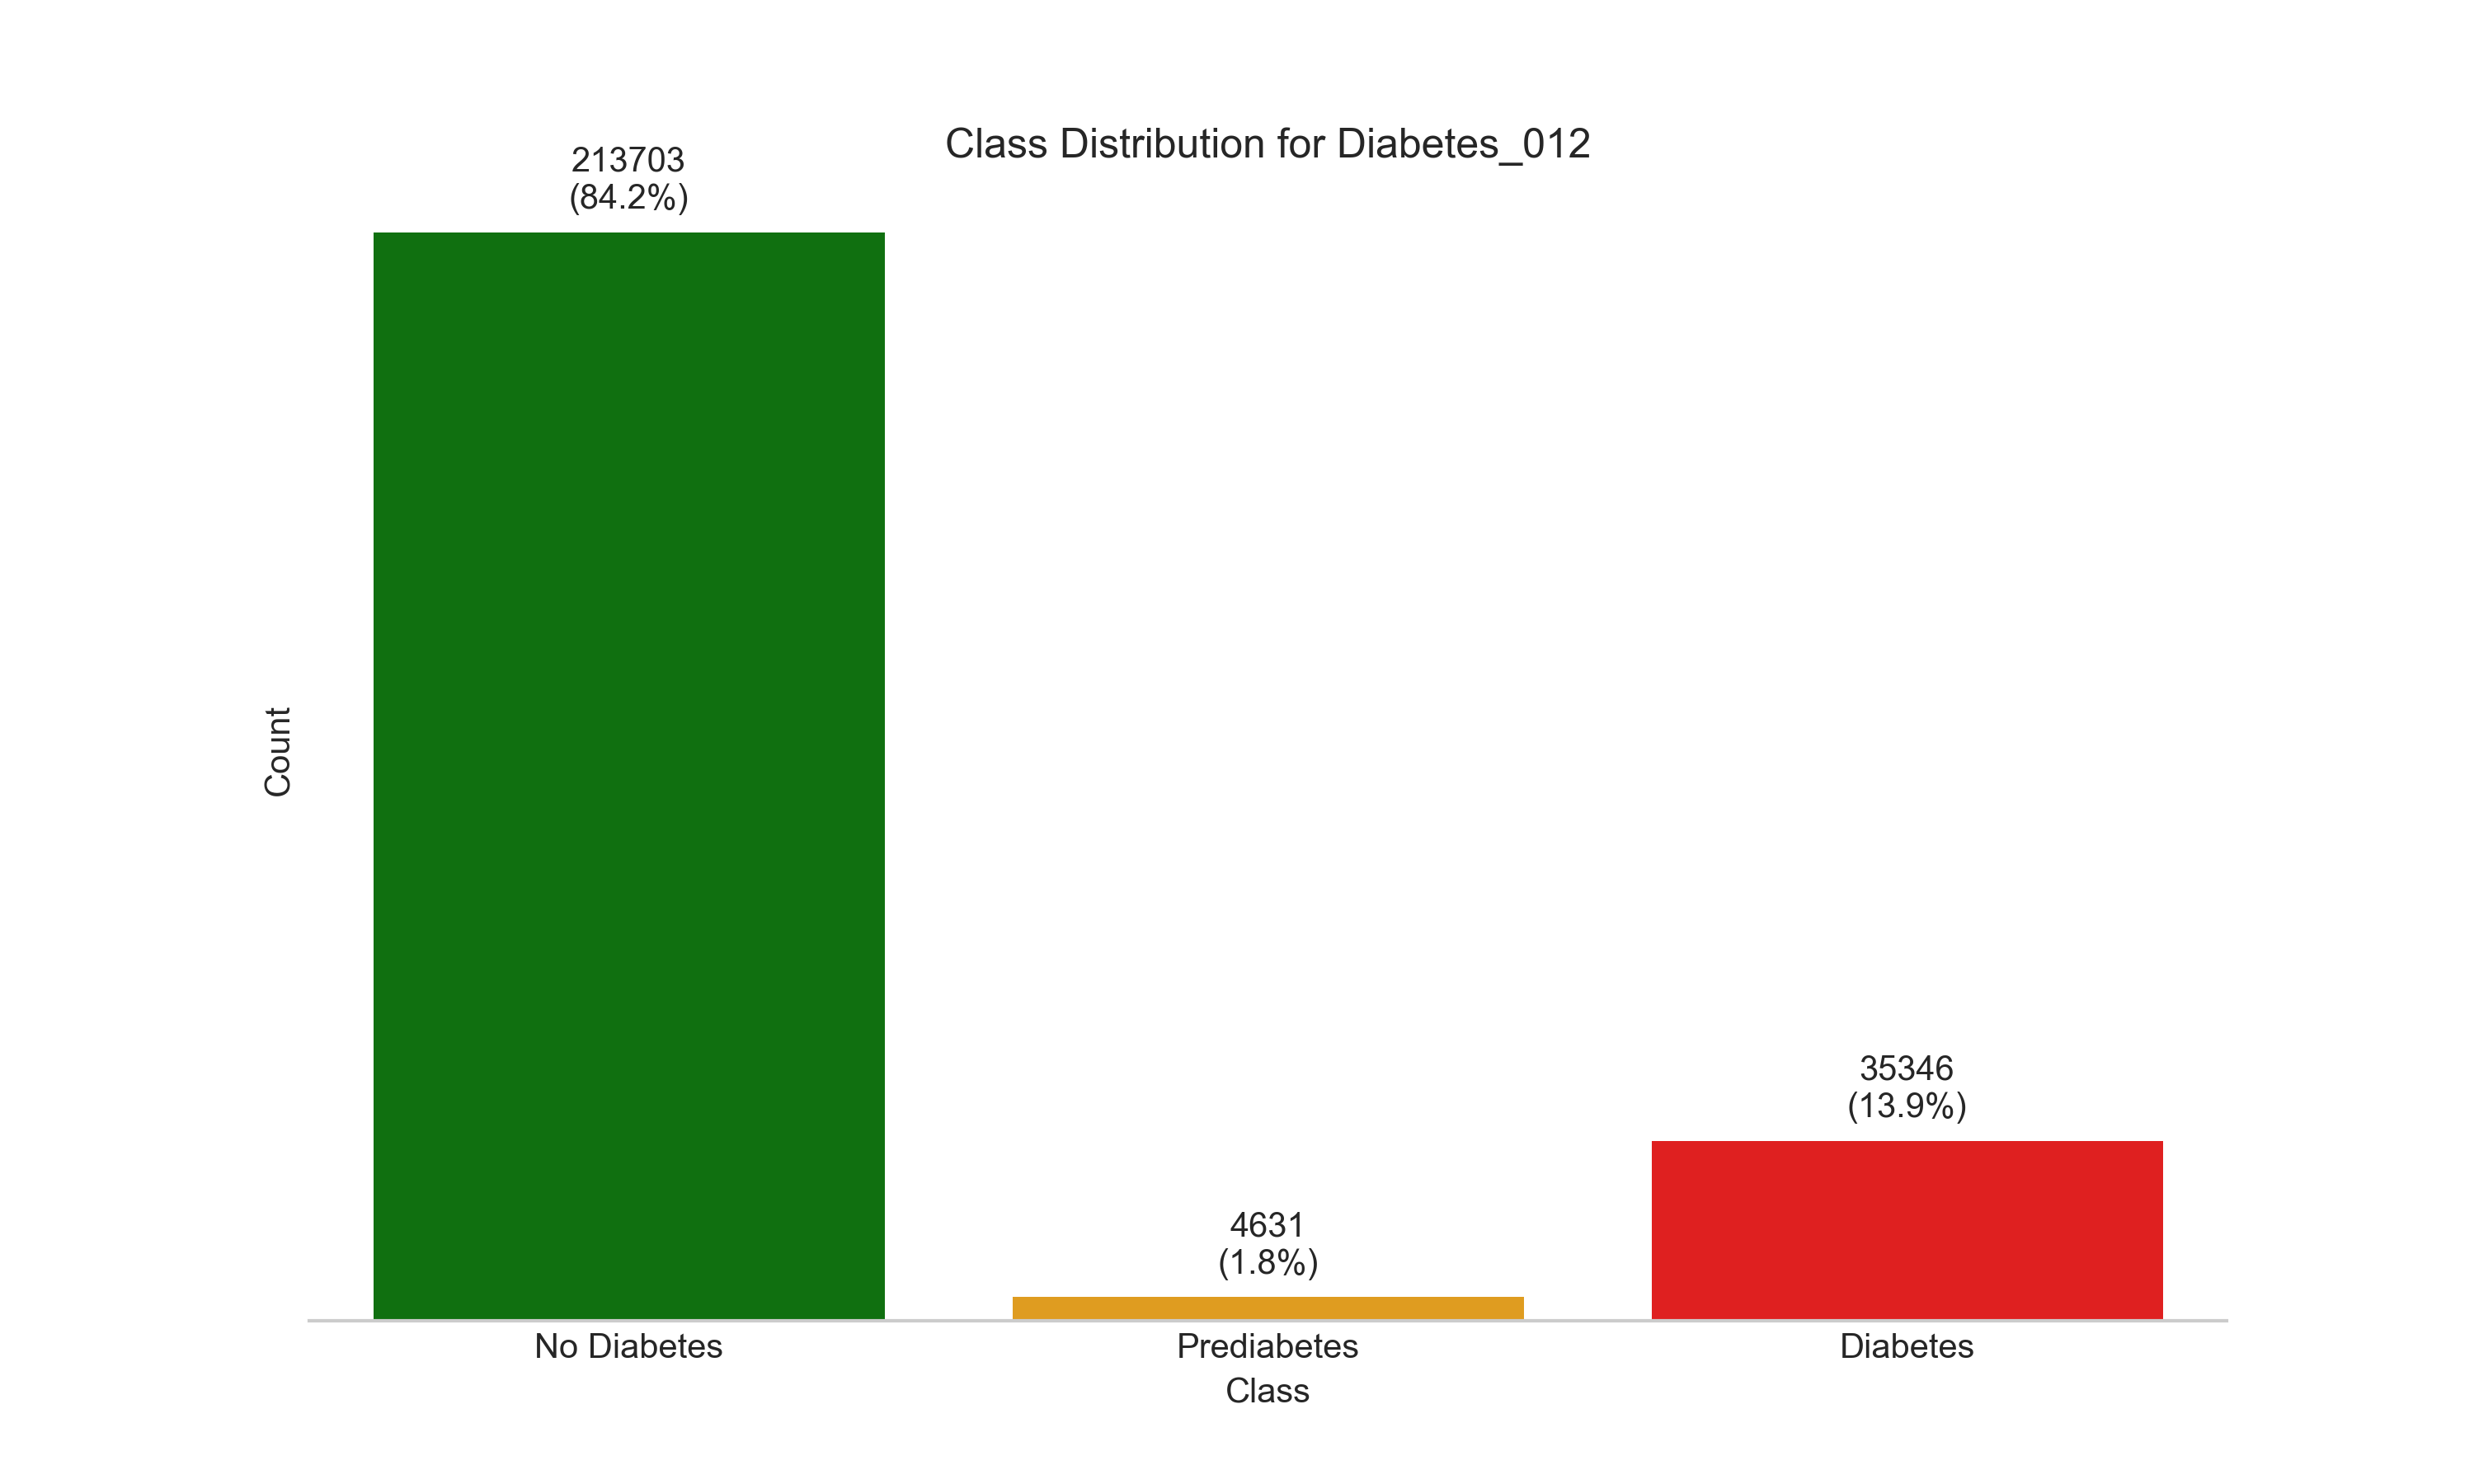

In [23]:
# Run the class imbalance analysis
analyze_class_imbalance(df)

# Display the generated image
imbalance_path = "reports/class_imbalance_figures/"
display_image_with_title(imbalance_path + "class_distribution.png", "Target Class Distribution")

<div style="background-color: #30302E; padding: 15px; border-radius: 5px; margin-top: 10px;">
    <h3>Target Class Imbalance Observations:</h3>
    <ul>
        <li><strong>Severe imbalance</strong> with approximately:</li>
        <ul>
            <li>84% No Diabetes (class 0)</li>
            <li>1.8% Prediabetes (class 1)</li>
            <li>13.9% Diabetes (class 2)</li>
        </ul>
        <li>Prediabetes class is significantly underrepresented</li>
        <li>This imbalance will require special handling during model development</li>
    </ul>
</div>

<div style="background-color: #30302E; padding: 15px; border-radius: 5px; border-left: 5px solid #6f42c1;">
    <h2 style="color: #6f42c1;">🔄 Feature Correlation Analysis</h2>
    <p>Identifying correlations between features and with the target variable.</p>
</div>

[2025-02-22 16:15:28] |     INFO | [analyze_correlations.py:  55] | Correlation analysis | the Feature Correlation plot is saved in reports\correlations_figures
[2025-02-22 16:15:29] |     INFO | [analyze_correlations.py:  74] | Correlation analysis | the target correlations plot is saved in reports\correlations_figures

## Feature Correlation Matrix


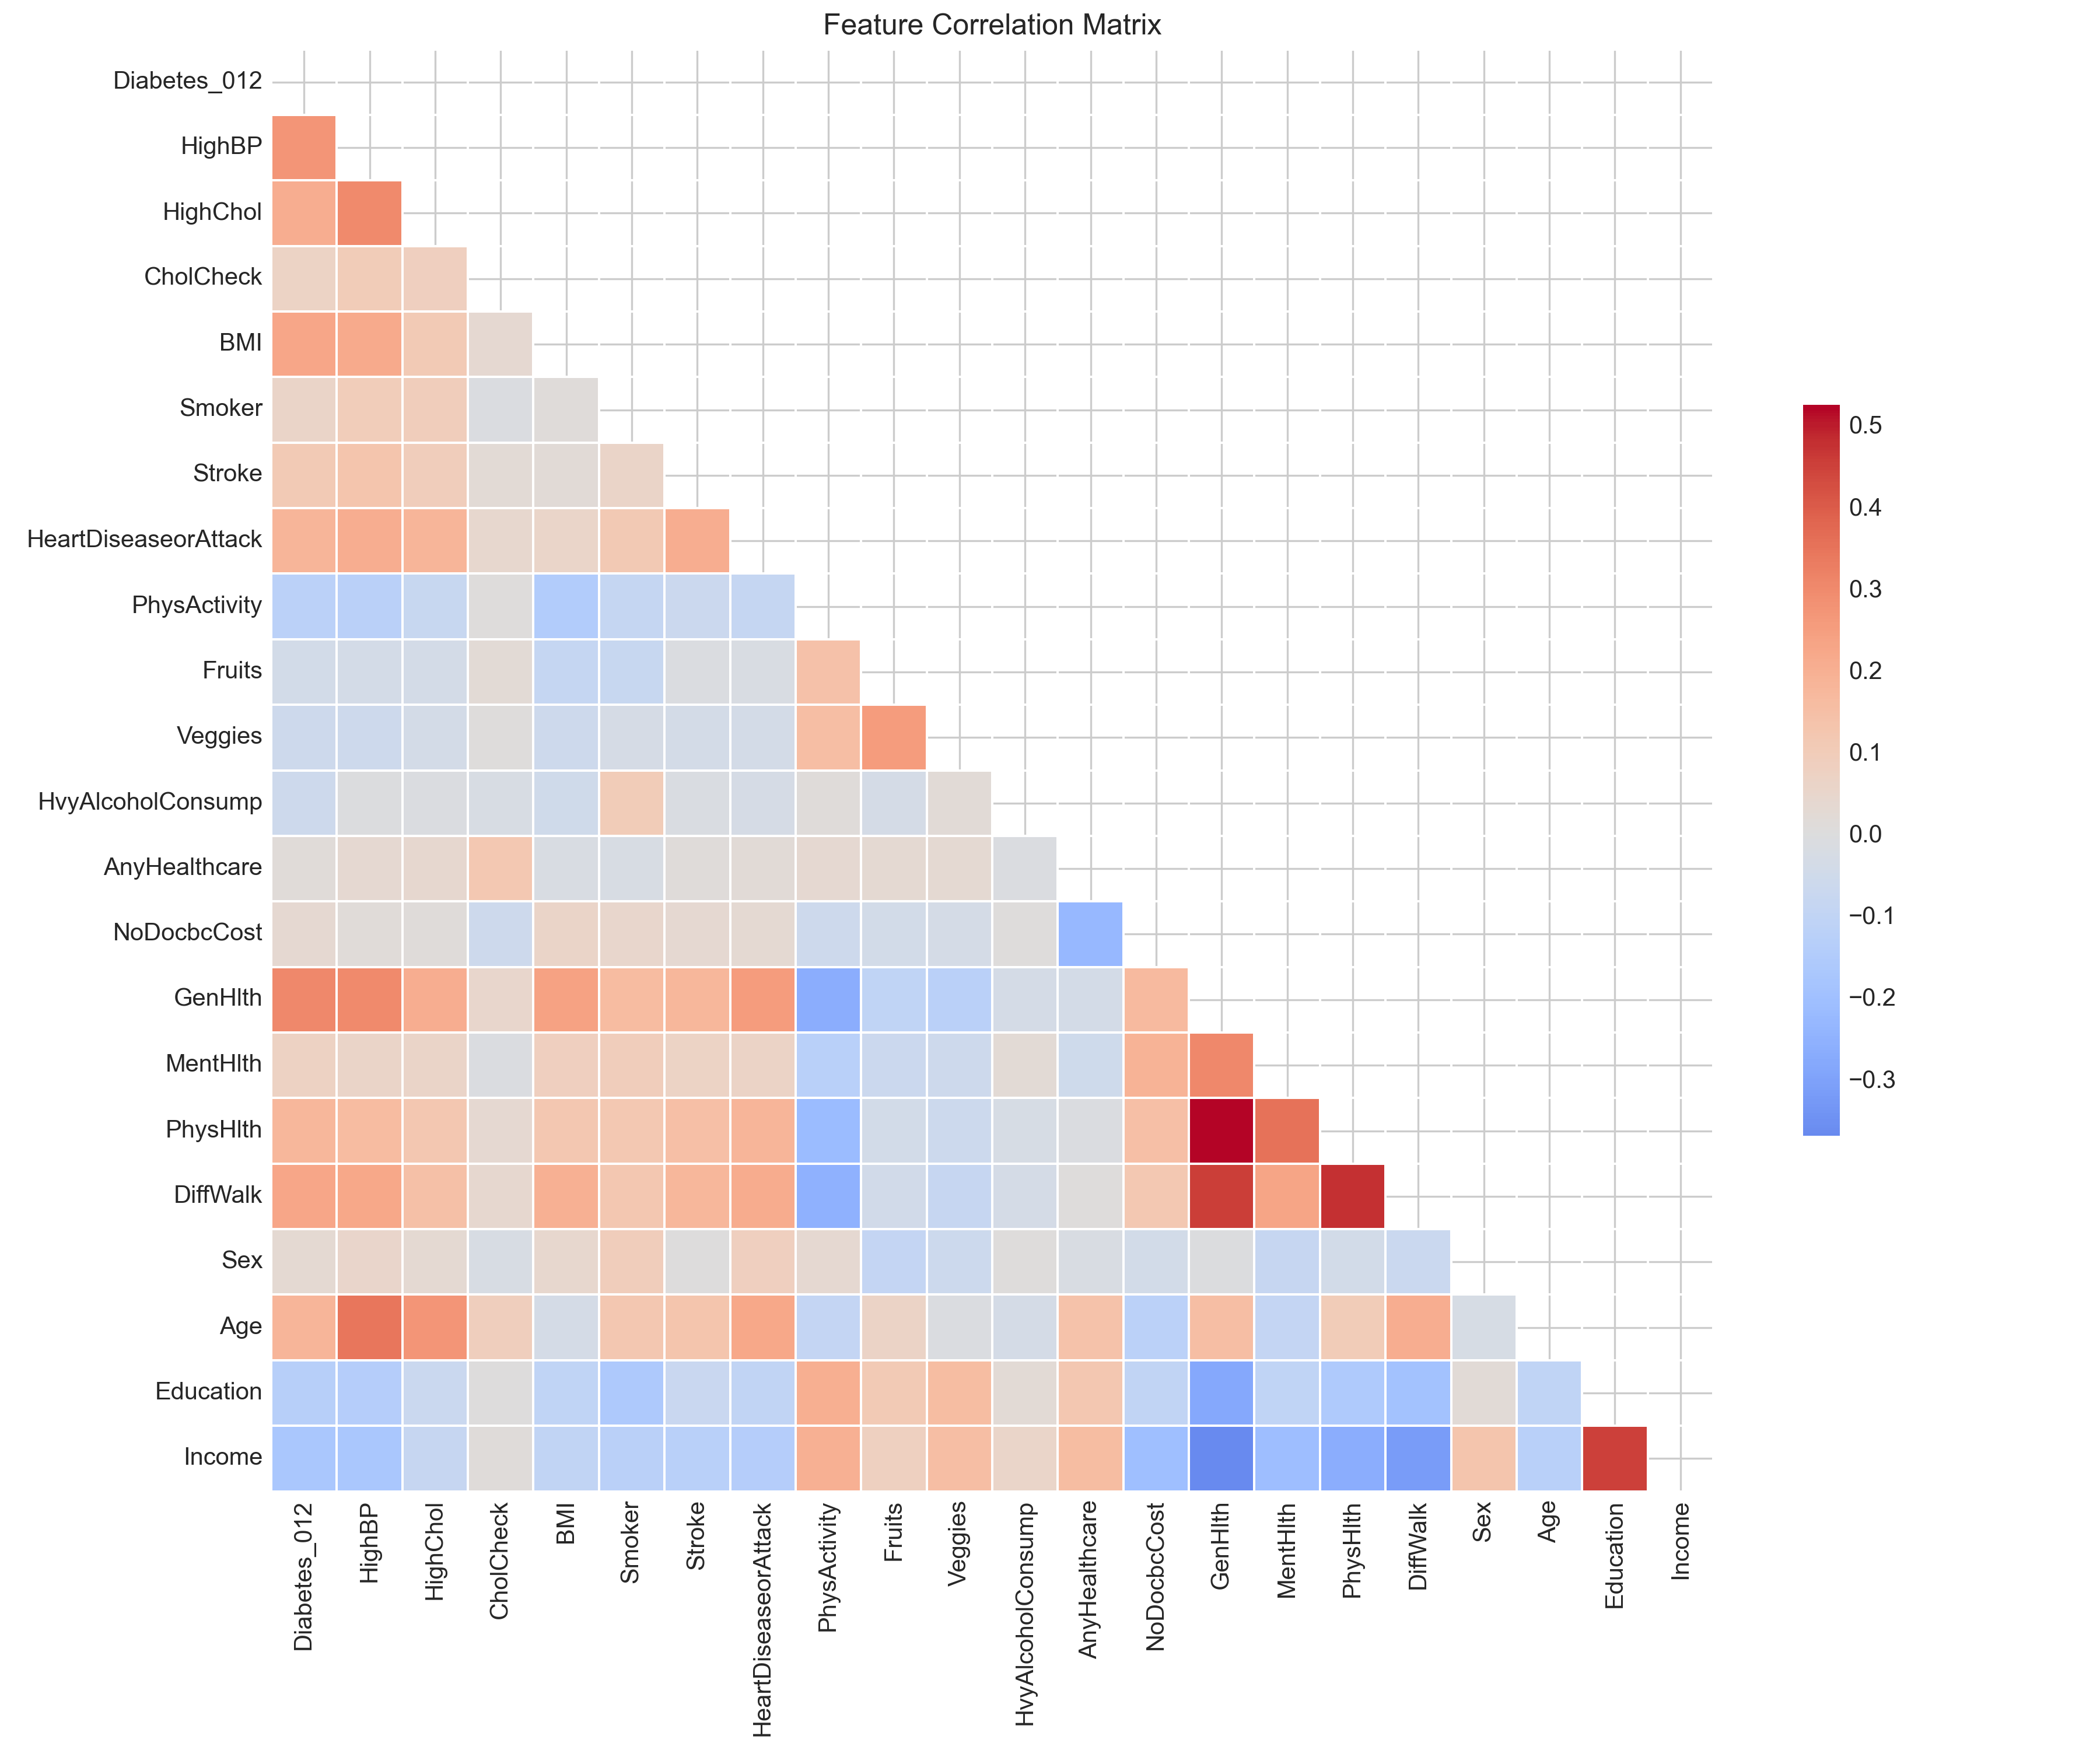

In [24]:
# Run the correlation analysis
correlation_matrix = analyze_correlations(df)

# Display the generated images
correlation_path = "reports/correlations_figures/"

# Display correlation matrix
display_image_with_title(correlation_path + "correlation_matrix.png", "Feature Correlation Matrix")


## Feature Correlations with Target


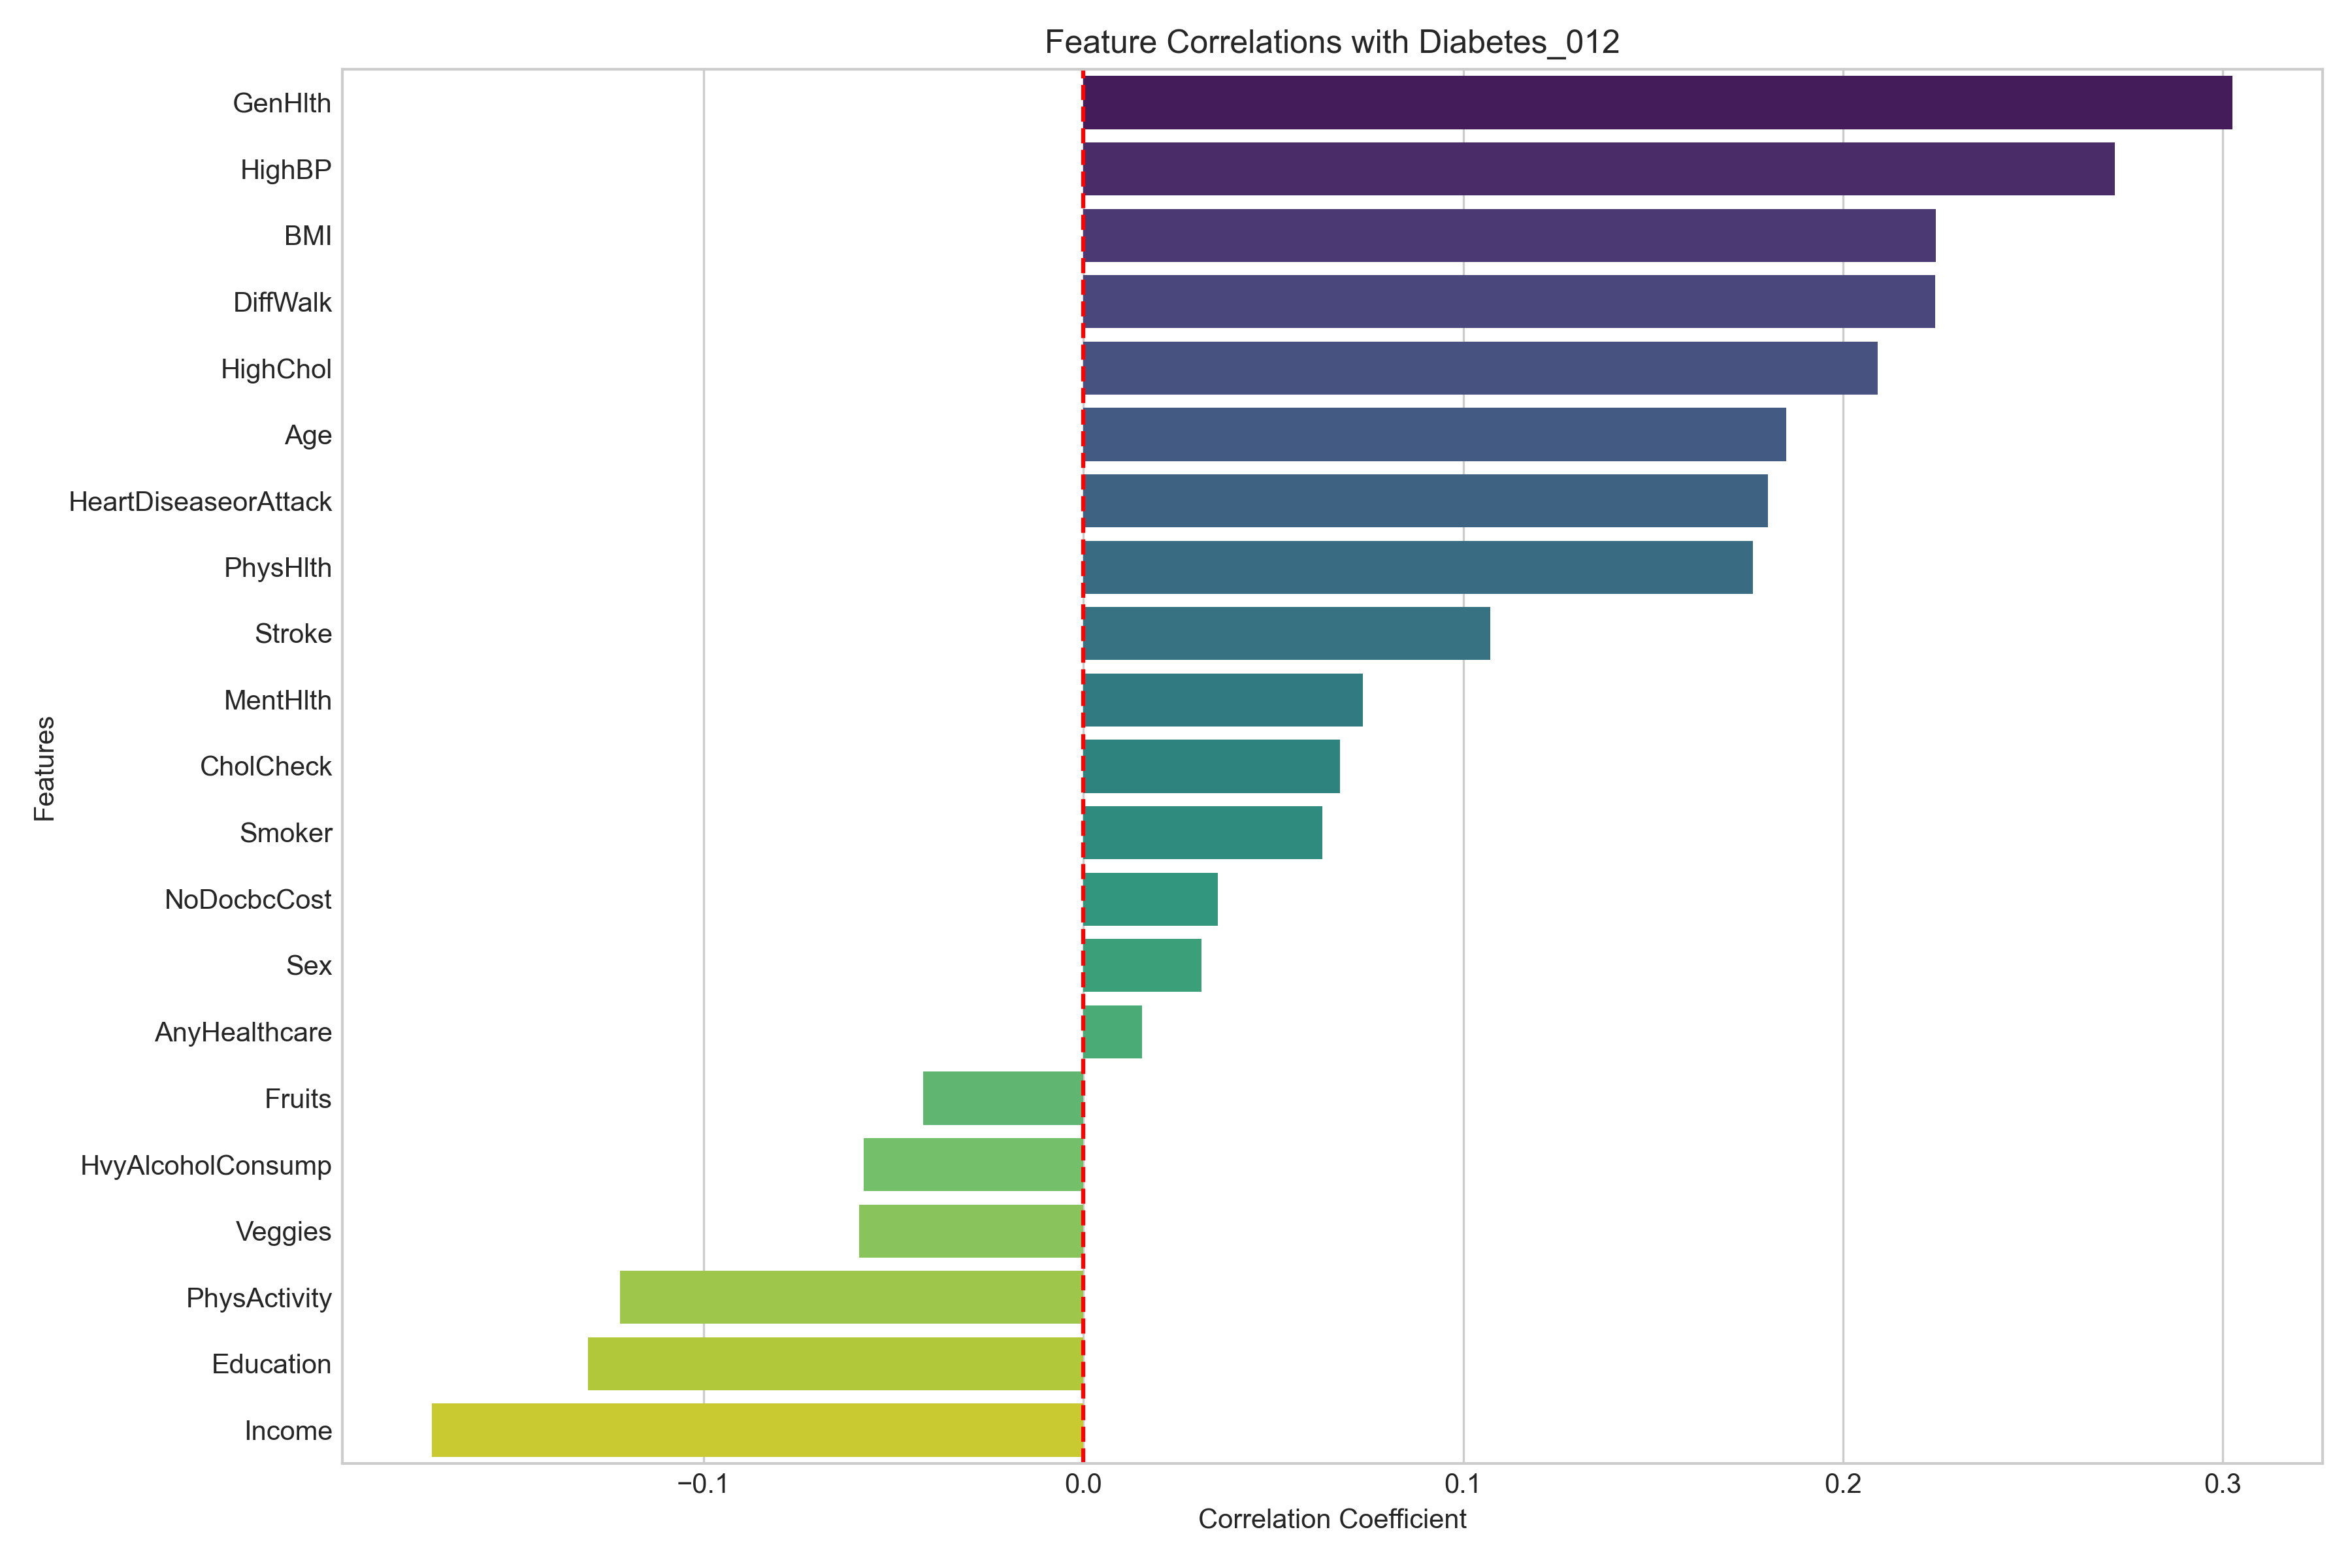

In [25]:
# Display target correlations
display_image_with_title(correlation_path + "target_correlations.png", "Feature Correlations with Target")

<div style="background-color: #30302E; padding: 15px; border-radius: 5px; margin-top: 10px;">
    <h3>Correlation Analysis Observations:</h3>
    <p><strong>Positive correlations with diabetes:</strong></p>
    <ul>
        <li><strong>GenHlth</strong>: Strong positive correlation (poorer general health associated with diabetes)</li>
        <li><strong>HighBP</strong>: Strong positive correlation</li>
        <li><strong>BMI</strong>: Notable positive correlation</li>
        <li><strong>DiffWalk</strong>: Significant positive correlation</li>
        <li><strong>HighChol</strong>: Positive correlation</li>
        <li><strong>Age</strong>: Positive correlation</li>
    </ul>
    <p><strong>Negative correlations with diabetes:</strong></p>
    <ul>
        <li><strong>Income</strong>: Strong negative correlation</li>
        <li><strong>Education</strong>: Notable negative correlation</li>
    </ul>
    <p><strong>Strong feature interrelationships:</strong></p>
    <ul>
        <li>(GenHlth, DiffWalk): Strong positive correlation</li>
        <li>(GenHlth, PhysHlth): Strong positive correlation</li>
        <li>(PhysHlth, DiffWalk): Strong positive correlation</li>
        <li>(Education, Income): Strong positive correlation</li>
        <li>(GenHlth, Income): Notable negative correlation</li>
    </ul>
</div>

<div style="background-color: #30302E; padding: 15px; border-radius: 5px; border-left: 5px solid #dc3545;">
    <h2>🏆 Feature Importance Analysis</h2>
    <p>Identifying the most predictive features for our classification task.</p>
</div>

[2025-02-22 16:16:36] |     INFO | [analyze_feature_importance.py:  59] | Feature_importance | Successfully saving the feature importance plot in reports\feature_importance_figures

## Random Forest Feature Importance


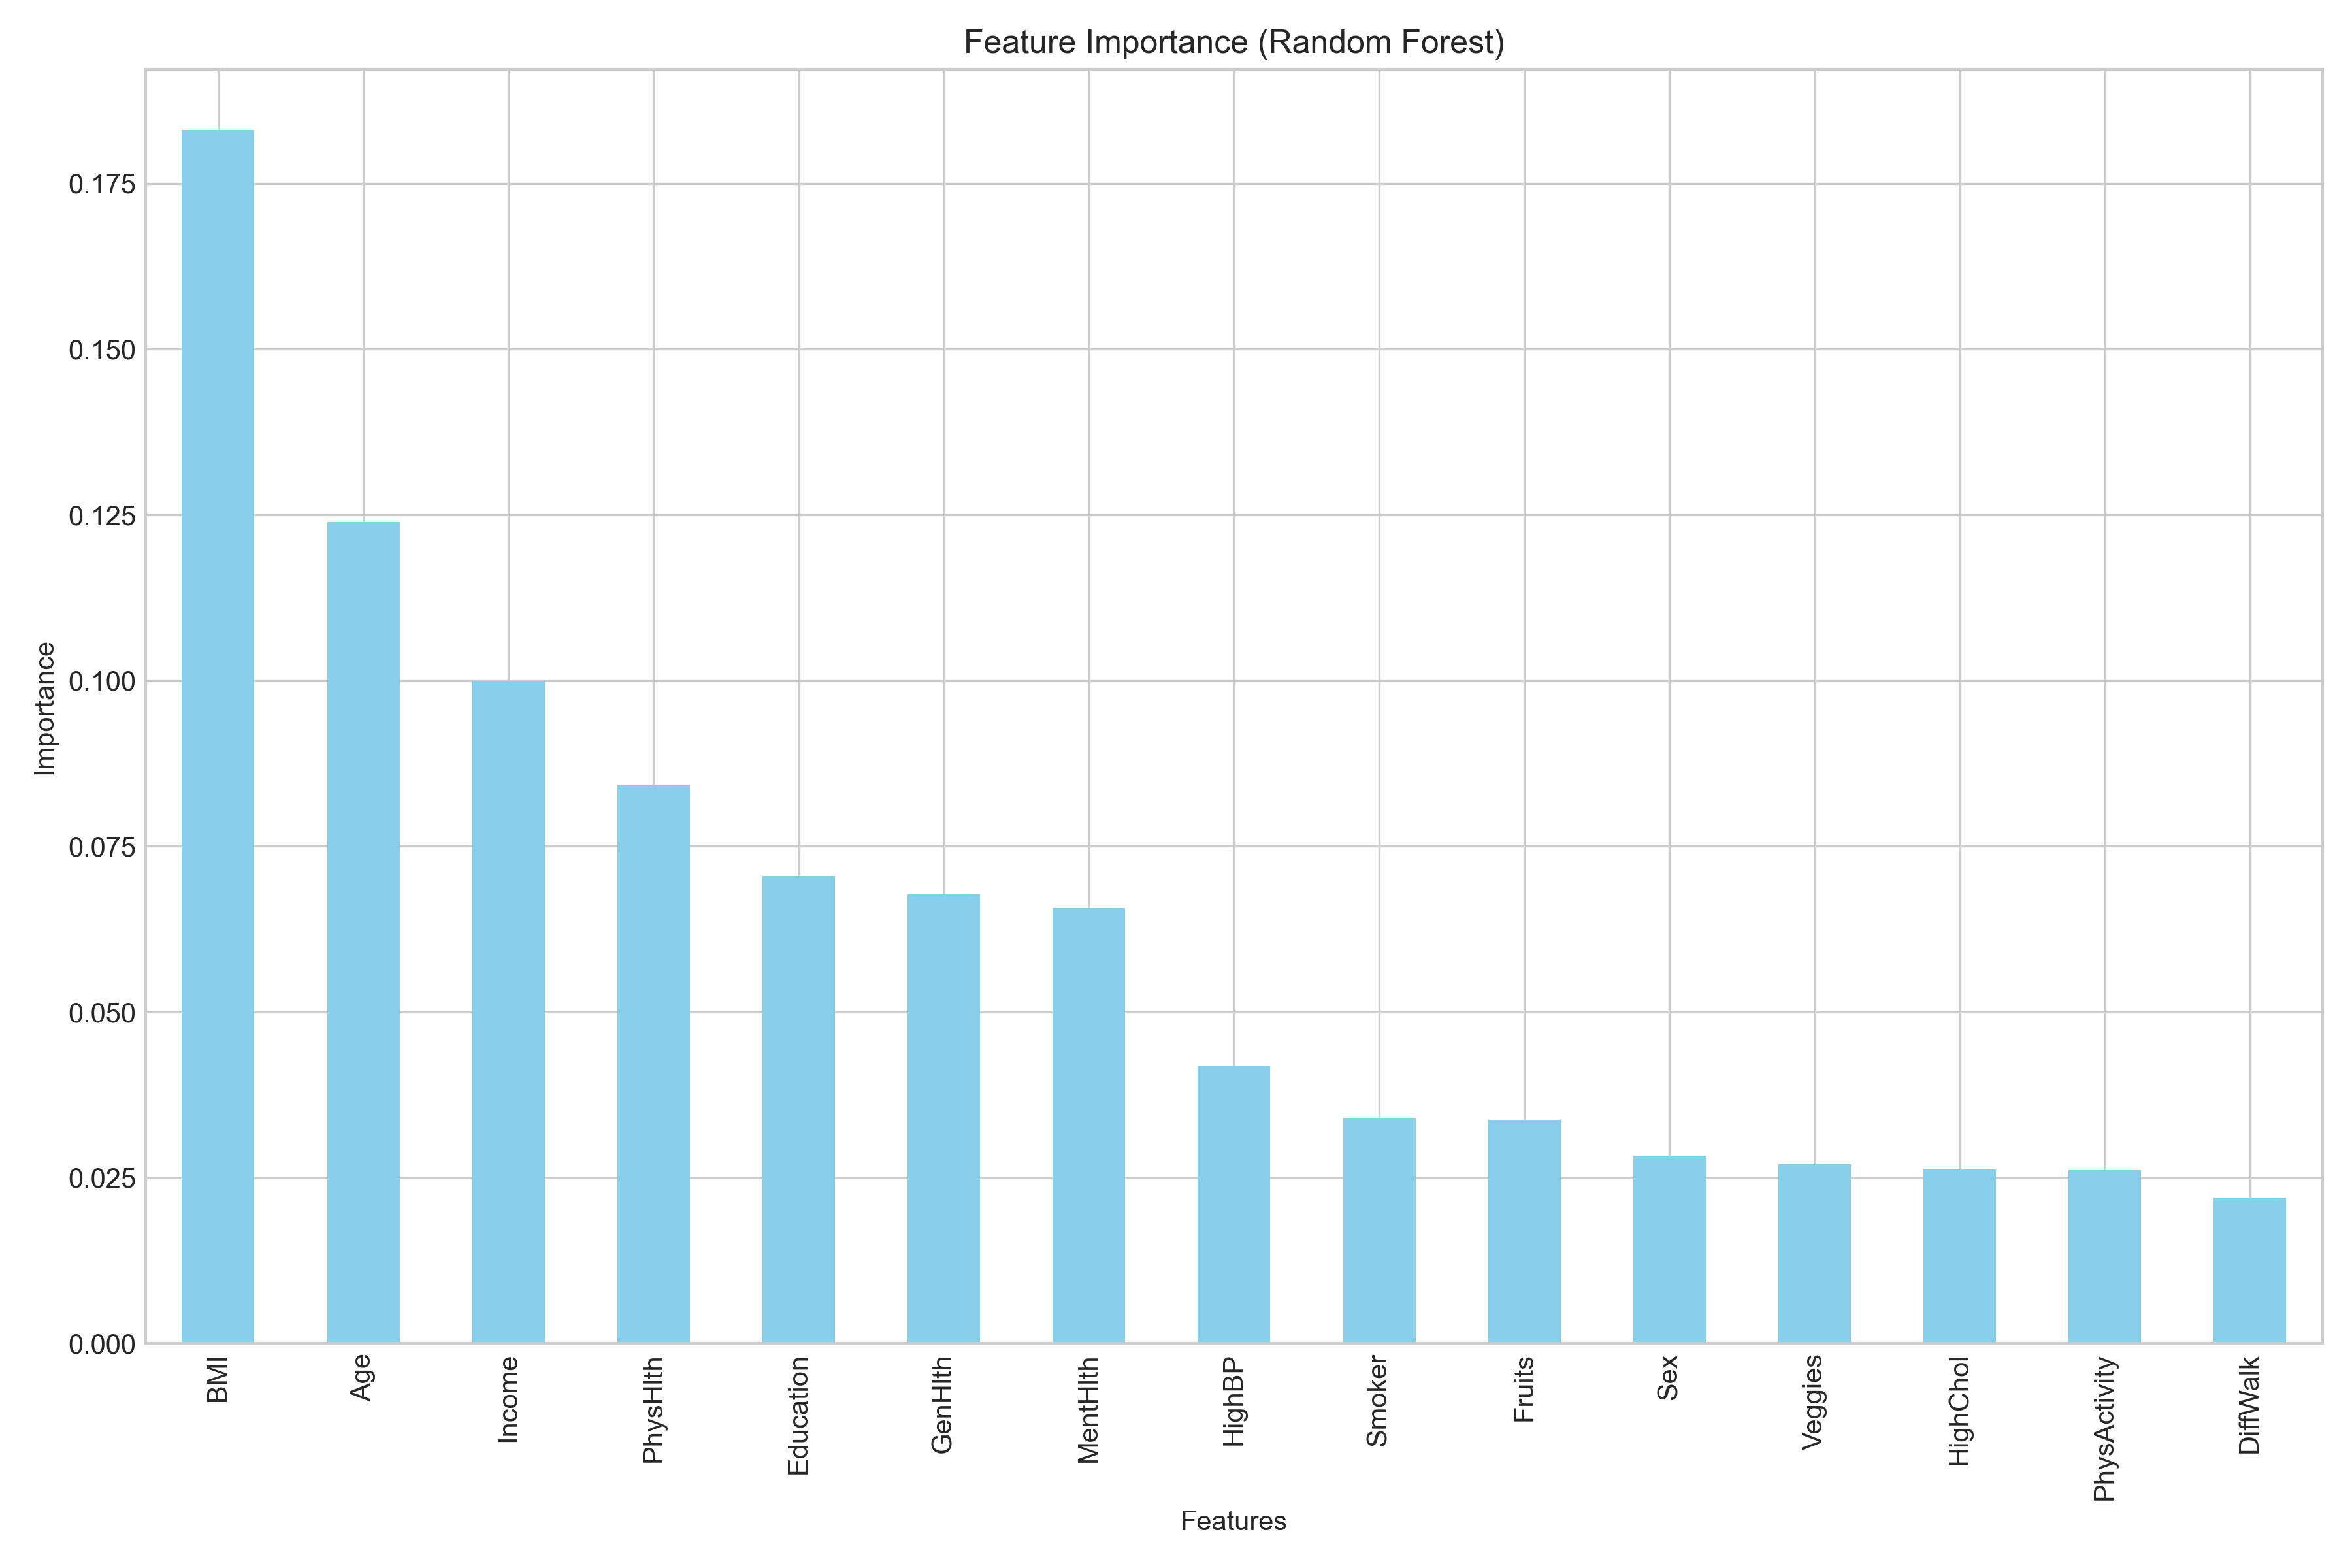

In [26]:
# Run the feature importance analysis
feature_importance = analyze_feature_importance(df)

# Display the generated image
importance_path = "reports/feature_importance_figures/"
display_image_with_title(importance_path + "rf_feature_importance.png", "Random Forest Feature Importance")

<div style="background-color: #30302E; padding: 15px; border-radius: 5px; margin-top: 10px;">
    <h3>Feature Importance Observations:</h3>
    <p><strong>Top 5 most important features:</strong></p>
    <ol>
        <li><strong>BMI</strong>: Highest importance, aligning with medical knowledge about diabetes risk factors</li>
        <li><strong>Age</strong>: Second most important, as diabetes risk increases with age</li>
        <li><strong>Income</strong>: Third most important, suggesting socioeconomic factors play a significant role</li>
        <li><strong>PhysHlth</strong>: Fourth most important, indicating physical health status importance</li>
        <li><strong>Education</strong>: Fifth most important, further highlighting socioeconomic dimensions</li>
    </ol>
    <p>This analysis confirms many known risk factors for diabetes and provides insight for feature engineering and selection.</p>
</div>

<div style="background-color: #30302E; padding: 20px; border-radius: 10px;margin-top: 30px;">
    <h1 style=" text-align: center;">📝 Summary Report & Recommendations</h1>
</div>
<div style="background-color: #30302E; padding: 20px; border-radius: 10px; margin-top: 20px;">
    <h2>Key Findings</h2>
    <h3>1. Data Characteristics and Quality</h3>
    <ul>
        <li>The dataset contains <strong>253,680 samples</strong> with <strong>22 features</strong> (21 predictors + 1 target)</li>
        <li>No missing values were detected, which is excellent for model development</li>
        <li>Contain +20 000 duplicated values that need handling</li>
        <li>Dataset includes binary, continuous, and ordinal features related to health indicators</li>
    </ul>
    <h3>2. Feature Distributions</h3>
    <ul>
        <li><strong>Binary features</strong>: Many show significant imbalance (e.g., CholCheck, Stroke, HeartDiseaseorAttack)</li>
        <li><strong>Continuous features</strong>: All three (BMI, MentHlth, PhysHlth) are skewed and contain outliers</li>
        <li><strong>Ordinal features</strong>: GenHlth and Age follow log-normal distributions; Education and Income are left-skewed</li>
    </ul>
    <h3>3. Target Class Imbalance</h3>
    <ul>
        <li><strong>Severe imbalance</strong>: 84% No Diabetes, 1.8% Prediabetes, 13.9% Diabetes</li>
        <li>Prediabetes class is particularly underrepresented, posing a significant challenge for classification</li>
    </ul>
    <h3>4. Feature Correlations</h3>
    <ul>
        <li><strong>Positive correlations</strong> with diabetes: GenHlth, HighBP, BMI, DiffWalk, HighChol, Age</li>
        <li><strong>Negative correlations</strong> with diabetes: Income, Education</li>
        <li>Several features show strong interrelationships, suggesting opportunities for dimensionality reduction</li>
    </ul>
    <h3>5. Feature Importance</h3>
    <ul>
        <li><strong>Top 5 features</strong>: BMI, Age, Income, PhysHlth, Education</li>
        <li>These align with established diabetes risk factors in medical literature</li>
    </ul>
    <h2 style="margin-top: 30px;">Recommendations for Next Steps</h2>
    <h3>1. Data Preprocessing</h3>
    <ul>
        <li><strong>Feature scaling</strong>: Apply appropriate scaling (e.g., StandardScaler) to continuous features</li>
        <li><strong>Outlier treatment</strong>: Consider capping or transforming outliers in BMI, MentHlth, and PhysHlth</li>
        <li><strong>Feature transformation</strong>: Apply log or other transformations to highly skewed features</li>
    </ul>
    <h3>2. Feature Engineering</h3>
    <ul>
        <li><strong>Implement planned composite features</strong> from the masterplan document:</li>
        <ul>
            <li>Health Score combining GenHlth, MentHlth, and PhysHlth</li>
            <li>Risk Score combining HighBP, HighChol, HeartDiseaseorAttack, BMI, and Age</li>
            <li>Age-BMI interaction term</li>
        </ul>
        <li><strong>Create additional interaction features</strong> based on correlation analysis</li>
        <li><strong>Consider dimensionality reduction</strong> for highly correlated features (PCA or feature selection)</li>
    </ul>
    <h3>3. Class Imbalance Handling</h3>
    <ul>
        <li><strong>Apply SMOTE</strong> as planned to generate synthetic samples for minority classes</li>
        <li><strong>Explore SMOTE variants</strong> like Borderline-SMOTE or ADASYN which may better handle the extreme imbalance</li>
        <li><strong>Consider class weights</strong> in model training to penalize misclassification of minority classes</li>
        <li><strong>Evaluate alternative sampling techniques</strong> like SMOTETomek or SMOTEnn for better boundary definition</li>
    </ul>
    <h3>4. Modeling Strategy</h3>
    <ul>
        <li><strong>Focus on tree-based models</strong> which perform well with the identified important features</li>
        <li><strong>Prioritize XGBoost and Random Forest</strong> given the feature importance patterns</li>
        <li><strong>Implement stratified cross-validation</strong> to maintain class distribution across folds</li>
        <li><strong>Optimize for recall</strong> especially for the Prediabetes class, which is severely underrepresented</li>
    </ul>
</div>